In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Colab Notebooks/eyes/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/Colab Notebooks/eyes/test'    # Update with your actual path



In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/eyes/train/open')))
print(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/eyes/train/closed')))
print(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/eyes/test/open')))
print(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/eyes/test/closed')))

500
500
500
500


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 380s 12s/step - accuracy: 0.6234 - loss: 0.7717 - val_accuracy: 0.8400 - val_loss: 0.4210
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 139s 6s/step - accuracy: 0.9266 - loss: 0.1994 - val_accuracy: 0.8300 - val_loss: 0.4021
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.9488 - loss: 0.1777 - val_accuracy: 0.8500 - val_loss: 0.3277
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 148s 6s/step - accuracy: 0.9786 - loss: 0.0797 - val_accuracy: 0.9250 - val_loss: 0.1908
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 147s 6s/step - accuracy: 0.9656 - loss: 0.1073 - val_accuracy: 0.8850 - val_loss: 0.3162
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 194s 6s/step - accuracy: 0.9212 - loss: 0.2395 - val_accuracy: 0.8800 - val_loss: 0.3427
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.9393 - loss: 0.1928 - val_accuracy: 0.8700 - val_loss: 0.3062
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 151s 6s/step - accuracy: 0.9693 - loss: 0.1111 - val_accuracy: 0.9450 - val_loss: 0

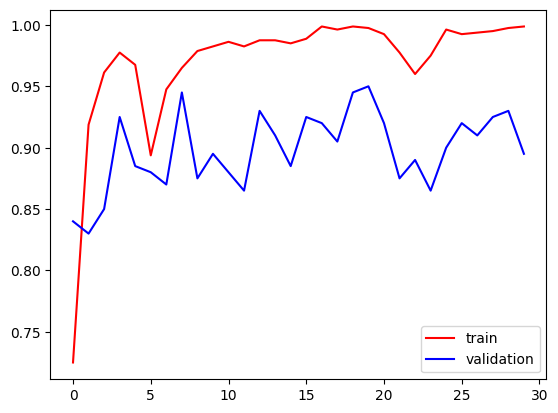

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

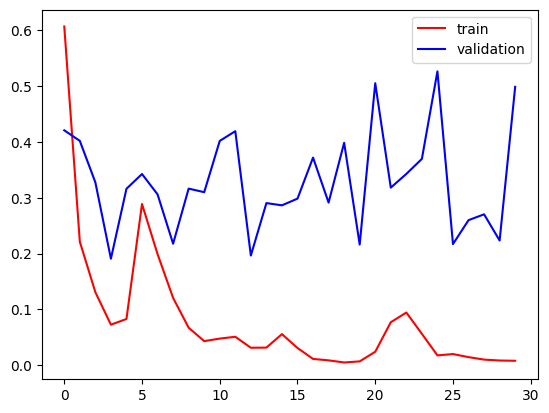

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

32/32 ━━━━━━━━━━━━━━━━━━━━ 170s 5s/step
[[9.96820033e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [7.13540554e-01]
 [4.92341860e-06]
 [2.69870526e-07]
 [1.91546579e-09]
 [9.99999881e-01]
 [2.47058978e-08]
 [5.54860478e-08]
 [4.05506700e-01]
 [1.00000000e+00]
 [2.55320017e-04]
 [9.99992430e-01]
 [1.42365317e-14]
 [9.52864230e-01]
 [4.69769257e-05]
 [1.00000000e+00]
 [1.17210755e-06]
 [6.82100847e-08]
 [1.89066410e-01]
 [3.88560729e-05]
 [1.00000000e+00]
 [3.00554439e-06]
 [9.65759397e-01]
 [9.53808248e-01]
 [9.78710234e-01]
 [5.86308714e-04]
 [1.60809232e-05]
 [6.28735113e-04]
 [1.00000000e+00]
 [1.00000000e+00]
 [8.06816729e-08]
 [6.28240437e-09]
 [9.87350404e-01]
 [3.00965439e-06]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999821e-01]
 [1.84210449e-01]
 [5.64954011e-03]
 [1.00000000e+00]
 [1.33620444e-04]
 [9.99959946e-01]
 [1.00000000e+00]
 [3.78937443e-07]
 [9.85499501e-01]
 [1.00000000e+00]
 [8.18278253e-01]
 [9.99946892e-01]
 [7.07470608e-05]
 [1.00000000e+00]
 [2.31355964e-03]
 [9.99

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report 1:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[244 256]
 [264 236]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.49      0.48       500
           1       0.48      0.47      0.48       500

    accuracy                           0.48      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.48      0.48      0.48      1000



There is overfitting and hence applying Batchnormalisation and Dropout techniques to handle overfitting

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 745s 24s/step - accuracy: 0.7626 - loss: 3.8508 - val_accuracy: 0.5000 - val_loss: 3.7291
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 217s 9s/step - accuracy: 0.9153 - loss: 2.0841 - val_accuracy: 0.5000 - val_loss: 7.1570
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 208s 8s/step - accuracy: 0.9403 - loss: 1.2219 - val_accuracy: 0.5000 - val_loss: 13.8688
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 207s 8s/step - accuracy: 0.9354 - loss: 1.4446 - val_accuracy: 0.5000 - val_loss: 17.6372
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 219s 9s/step - accuracy: 0.9452 - loss: 1.5732 - val_accuracy: 0.5000 - val_loss: 46.0136
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 207s 8s/step - accuracy: 0.9520 - loss: 1.0531 - val_accuracy: 0.5000 - val_loss: 58.6313
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 208s 8s/step - accuracy: 0.9540 - loss: 1.2382 - val_accuracy: 0.5000 - val_loss: 48.6107
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 262s 8s/step - accuracy: 0.9511 - loss: 1.9240 - val_accuracy: 0.5000 - val_lo

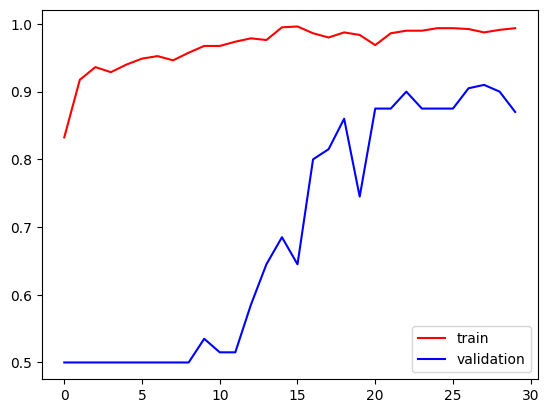

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

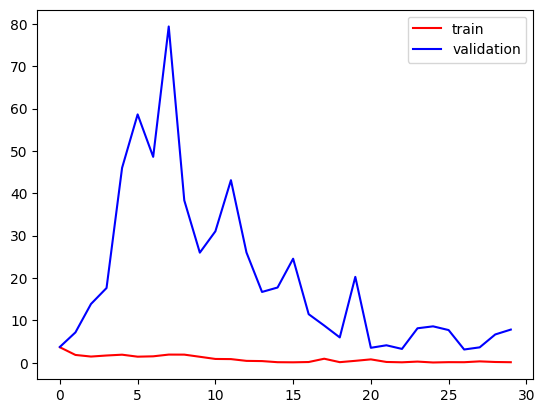

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

32/32 ━━━━━━━━━━━━━━━━━━━━ 333s 11s/step
[[1.00000000e+00]
 [1.00000000e+00]
 [0.00000000e+00]
 [1.00000000e+00]
 [3.12821794e-04]
 [1.52013002e-09]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99998868e-01]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [5.26438049e-18]
 [1.31877066e-21]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [0.00000000e+00]
 [1.00000000e+00]
 [0.00000000e+00]
 [2.13266167e-28]
 [1.00000000e+00]
 [0.00000000e+00]
 [5.36033804e-12]
 [0.00000000e+00]
 [4.04306687e-04]
 [1.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.00000000e+00]
 [9.99941647e-01]
 [1.00000000e+00]
 [4.30766398e-15]
 [1.65202234e-20]
 [9.99985456e-01]
 [9.99856591e-01]
 [9.39798415e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [0.00000000e+00]
 [1.00000000e+00]
 [0.00000000e+00]
 [1.00000000e+00]
 [2.11509506e-15]
 [0.00000000e+00]
 [1.00000000e+00]
 [3.86062356e-18]
 [3.75903892e-06]
 [0.0

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report 2 after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[306 194]
 [290 210]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.61      0.56       500
           1       0.52      0.42      0.46       500

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.51      1000
weighted avg       0.52      0.52      0.51      1000



In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 227s 9s/step - accuracy: 0.9882 - loss: 0.4892 - val_accuracy: 0.6700 - val_loss: 10.0269
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 208s 8s/step - accuracy: 0.9797 - loss: 0.2587 - val_accuracy: 0.6700 - val_loss: 13.6120
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 260s 8s/step - accuracy: 0.9809 - loss: 1.5485 - val_accuracy: 0.7350 - val_loss: 17.1542
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 209s 8s/step - accuracy: 0.9790 - loss: 0.4087 - val_accuracy: 0.8750 - val_loss: 4.8312
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 211s 8s/step - accuracy: 0.9779 - loss: 1.0086 - val_accuracy: 0.7350 - val_loss: 18.2711
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 264s 8s/step - accuracy: 0.9852 - loss: 0.6137 - val_accuracy: 0.8900 - val_loss: 2.6369
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 211s 8s/step - accuracy: 0.9914 - loss: 0.1874 - val_accuracy: 0.8650 - val_loss: 3.7094
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 209s 8s/step - accuracy: 0.9960 - loss: 0.0589 - val_accuracy: 0.8700

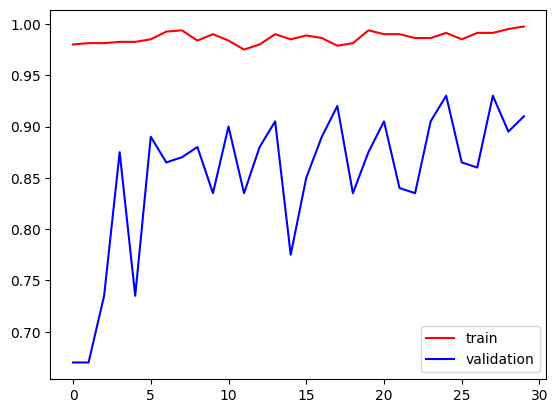

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

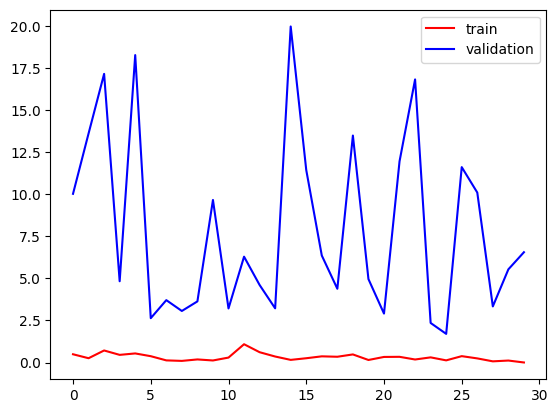

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step
[[1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [0.00000000e+00]
 [1.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.30953416e-33]
 [1.00000000e+00]
 [1.00000000e+00]
 [7.79266937e-17]
 [7.01298798e-03]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.98352612e-10]
 [1.00000000e+00]
 [0.00000000e+00]
 [1.00000000e+00]
 [0.00000000e+00]
 [1.00000000e+00]
 [9.22635110e-14]
 [1.00000000e+00]
 [1.00000000e+00]
 [0.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.88122284e-01]
 [1.00000000e+00]
 [1.25075753e-26]
 [0.00000000e+00]
 [3.89586583e-13]
 [6.63018107e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [4.78898357e-07]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.51151874e-14]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.64924098e-33]
 [1.00000000e+00]
 [1.00000000e+00]
 [0.00000000e+00]
 [1.00000000e+00]
 [0.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [8.179

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report 3 after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[217 283]
 [191 309]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.43      0.48       500
           1       0.52      0.62      0.57       500

    accuracy                           0.53      1000
   macro avg       0.53      0.53      0.52      1000
weighted avg       0.53      0.53      0.52      1000

